In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
data=pd.read_csv('TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
data.isnull().sum().sum()

0

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


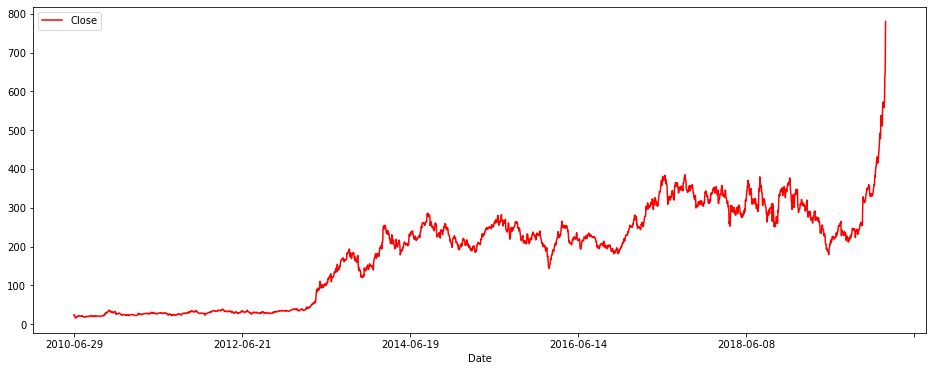

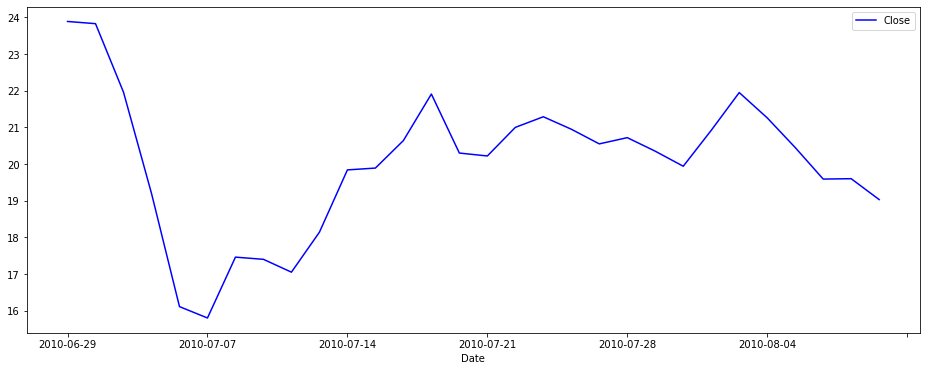

In [7]:
plt.rcParams['figure.figsize']=(16,6)
data.plot('Date','Close',color='red')
new_data=data.head(30)
new_data.plot('Date','Close',color='blue')
plt.show()

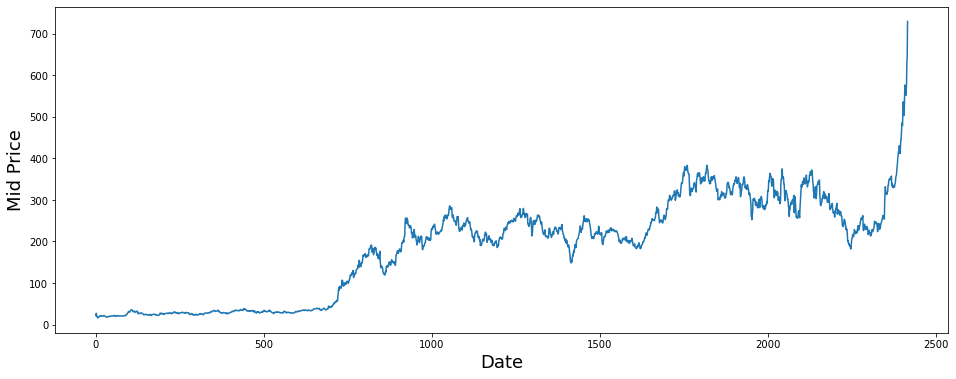

In [8]:
plt.rcParams['figure.figsize']=(16,6)
plt.plot(range(data.shape[0]),(data['High']+data['Low'])/2.0)
plt.xlabel('Date',fontsize='18')
plt.ylabel('Mid Price',fontsize='18')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
X_train=np.array(train.index).reshape(-1,1)
print(X_train.shape)

(1932, 1)


In [11]:
Y_train=train['Close']

In [12]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [13]:
print("Slope",model.coef_)#means with 1 unit increase in the date the closing price increases by 0.15$
print("Intercept",model.intercept_)

Slope [0.15276057]
Intercept 2.36746266026708


In [14]:
pred=model.predict(X_train)
print(pred)

[173.76481802 113.42439434 246.93712927 ... 118.92377473 129.9225355
 254.88067872]


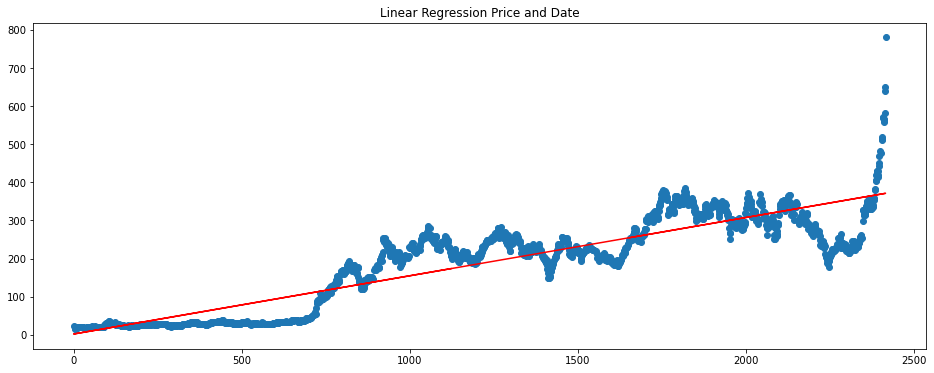

In [15]:
plt.rcParams['figure.figsize']=(16,6)
plt.title('Linear Regression Price and Date')
plt.scatter(X_train,Y_train,label='Actual Price')
plt.plot(X_train,pred,color='r',label='Predicted Price')
plt.show()

In [16]:
X_test=np.array(test.index).reshape(-1,1)
Y_test=test['Close']
Y_pred=model.predict(X_test)

In [17]:
df=pd.DataFrame({'Date':test['Date'],'Actual':Y_test,'Prediction':Y_pred,'Error':(Y_test-Y_pred)}).head(20)
df

,Date,Actual,Prediction,Error
966,2014-05-01,207.729996,149.934170,57.795826
557,2012-09-12,28.280001,87.455098,-59.175097
148,2011-01-28,24.010000,24.976026,-0.966026
1917,2018-02-08,315.230011,295.209468,20.020543
1585,2016-10-13,200.240005,244.492960,-44.252955
985,2014-05-29,210.240005,152.836620,57.403385
215,2011-05-05,26.440001,35.210984,-8.770983
390,2012-01-13,22.790001,61.944084,-39.154083
1299,2015-08-26,224.839996,200.803438,24.036558
1806,2017-08-30,353.179993,278.253045,74.926948


In [18]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=200)
reg.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200)

In [19]:
pred=reg.predict(X_test)
pred

array([209.41420042,  28.40679949,  24.68255003, 335.90965308,
       199.91224622, 208.45010401,  26.85835096,  28.10859997,
       226.72625002, 349.68888867, 221.02284449, 281.35594458,
        31.22715002, 101.49154978,  20.5579002 , 338.79589518,
       107.06085091, 253.67099823,  27.55850022, 223.3469457 ,
       358.68630213, 323.09465081, 224.75225159, 335.55464301,
       300.58724553, 187.09915022, 334.0063972 , 270.53284956,
       226.23705058, 247.39745165,  26.78900023,  31.49139948,
        29.75445064, 221.54010303, 386.03324533, 215.22079772,
       210.00369854, 142.29524731, 321.59180908, 218.83839994,
       310.31870477,  36.28554915,  23.84704995, 220.12584626,
        28.39864977, 231.94424495, 202.37905257,  34.05135116,
       323.58998884, 268.07485606, 237.08785056, 301.8976602 ,
        36.61619923, 216.5015988 , 283.92504168, 224.48759769,
        33.62990036, 237.61819868,  17.41549922,  50.1660995 ,
       229.67479913,  33.88155112, 260.29765571, 327.69

In [20]:
df=pd.DataFrame({'Date':test['Date'],'Actual':Y_test,'Prediction':pred,'Error':(Y_test-pred)}).head(20)
df

,Date,Actual,Prediction,Error
966,2014-05-01,207.729996,209.414200,-1.684204
557,2012-09-12,28.280001,28.406799,-0.126798
148,2011-01-28,24.010000,24.682550,-0.672550
1917,2018-02-08,315.230011,335.909653,-20.679642
1585,2016-10-13,200.240005,199.912246,0.327759
985,2014-05-29,210.240005,208.450104,1.789901
215,2011-05-05,26.440001,26.858351,-0.418350
390,2012-01-13,22.790001,28.108600,-5.318599
1299,2015-08-26,224.839996,226.726250,-1.886254
1806,2017-08-30,353.179993,349.688889,3.491104
